In [258]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split, TensorDataset
import torch.nn.functional as F
from tqdm.auto import tqdm
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from torch.autograd import Variable
import sys

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
device = DEVICE
print(DEVICE)

cpu


In [271]:
sns.set(font_scale=1.5)

X_np = np.random.uniform(-10, 10,600)
X_np.sort()
X = torch.Tensor(X_np)
X.sort()
y = 3*X ** 3 - 4 * X ** 2 + 5 * X - 6 + torch.randn(600) * 300

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)

X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

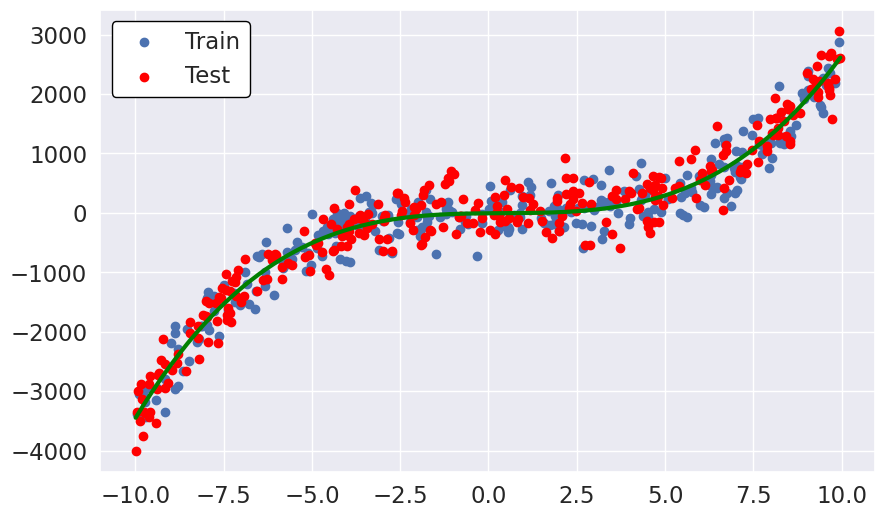

In [272]:
plt.figure(figsize=(10,6))
plt.scatter(X_train,y_train, label='Train')
plt.scatter(X_test,y_test, label='Test', color="red")
plt.plot(X, 3*X ** 3 - 4* X ** 2+ 5 * X - 6, color='green', lw=3, alpha = 1)
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.show()

In [273]:
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_test, y_test)

batch = 8

train_loader = DataLoader(train_dataset, batch_size=batch)
val_loader = DataLoader(val_dataset, batch_size=batch)

In [274]:
class LinearModel(nn.Module):
  def __init__(self, in_features, out_features):
    super(LinearModel, self).__init__()

    self.lin_linear_1 = self.make_layer(in_features, in_features * 40)
    self.lin_linear_2 = self.make_layer(in_features * 40, in_features * 80)
    self.lin_linear_3 = self.make_layer(in_features * 80, in_features * 160)
    self.lin_linear_4 = self.make_layer(in_features * 160, in_features * 320)
    self.lin_linear_5 = self.make_layer(in_features * 320, in_features * 320)
    self.lin_linear_6 = self.make_layer(in_features * 320, in_features * 160)
    self.lin_linear_7 = self.make_layer(in_features * 160, in_features * 160)
    self.lin_linear_8 = self.make_layer(in_features * 160, in_features * 80)
    self.lin_linear_9 = self.make_layer(in_features * 80, in_features * 40)
    self.lin_linear_10 = self.make_layer(in_features * 40, out_features)
    self.relu = F.relu

  def make_layer(self, in_f, out_f):
    return nn.Linear(in_f, out_f)

  def forward(self, x):
    x = self.relu(self.lin_linear_1(x))
    x = self.relu(self.lin_linear_2(x))
    x = self.relu(self.lin_linear_3(x))
    x = self.relu(self.lin_linear_4(x))
    x = self.relu(self.lin_linear_5(x))
    x = self.relu(self.lin_linear_6(x))
    x = self.relu(self.lin_linear_7(x))
    x = self.relu(self.lin_linear_8(x))
    x = self.relu(self.lin_linear_9(x))
    x = self.lin_linear_10(x)
    return x

In [275]:
model = LinearModel(1, 1)

In [276]:
# Коэффициент скорости обучения. При большом значении результат будет "скакать". При малом - длительное время оптимизации.
learnRate = 0.0005
# Выбор оптимизатора.
optimiser =  optim.Adam(model.parameters(), lr =learnRate)
# Выбор критерия оценки потерь. Выбирается среднеквадратичная ошибка.
criterion = nn.MSELoss()
# Количество циклов - эпох
epochs = 150

In [277]:
train_loss_history = []
test_loss_history = []
for epoch in tqdm(range(epochs)):

    train_loss = 0.0
    test_loss = 0.0
    model.train()
    for x_batch, y_batch in train_loader:

      x_batch, y_batch = x_batch.to(device), y_batch.to(device)

      model.zero_grad()

      predicted_values = model(x_batch)
      loss = criterion(predicted_values, y_batch)
      loss.backward()
      optimiser.step()

      train_loss += loss.item()

    train_loss /= len(train_loader)
    train_loss_history.append(train_loss)
    with torch.inference_mode():
      model.eval()
      for x_test_batch, y_test_batch in val_loader:

        x_test_batch, y_test_batch = x_test_batch.to(device), y_test_batch.to(device)

        test_predictions = model(x_test_batch)

        test_loss += criterion(test_predictions, y_test_batch).item()
    test_loss /= len(val_loader)
    test_loss_history.append(test_loss)
    print(f"Epoch: {epoch} | Train loss: {train_loss} |  Test loss: {test_loss}")

  0%|          | 0/150 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1242506.3305921052 |  Test loss: 1745295.9736842106
Epoch: 1 | Train loss: 613068.6648848684 |  Test loss: 442528.21021792764
Epoch: 2 | Train loss: 337687.4379111842 |  Test loss: 350807.4187911184
Epoch: 3 | Train loss: 323081.9170435855 |  Test loss: 325702.9346217105
Epoch: 4 | Train loss: 311617.7250205592 |  Test loss: 315312.4428453947
Epoch: 5 | Train loss: 302264.10906661185 |  Test loss: 304393.89288651315
Epoch: 6 | Train loss: 292833.4407894737 |  Test loss: 300358.18544407893
Epoch: 7 | Train loss: 284378.8895970395 |  Test loss: 296126.75616776315
Epoch: 8 | Train loss: 274855.859375 |  Test loss: 299287.63404605264
Epoch: 9 | Train loss: 269107.9928042763 |  Test loss: 285785.5945723684
Epoch: 10 | Train loss: 260333.60906661185 |  Test loss: 285783.33429276315
Epoch: 11 | Train loss: 254460.10207648025 |  Test loss: 255255.30674342104
Epoch: 12 | Train loss: 244791.04091282896 |  Test loss: 243048.43359375
Epoch: 13 | Train loss: 237476.8229851973

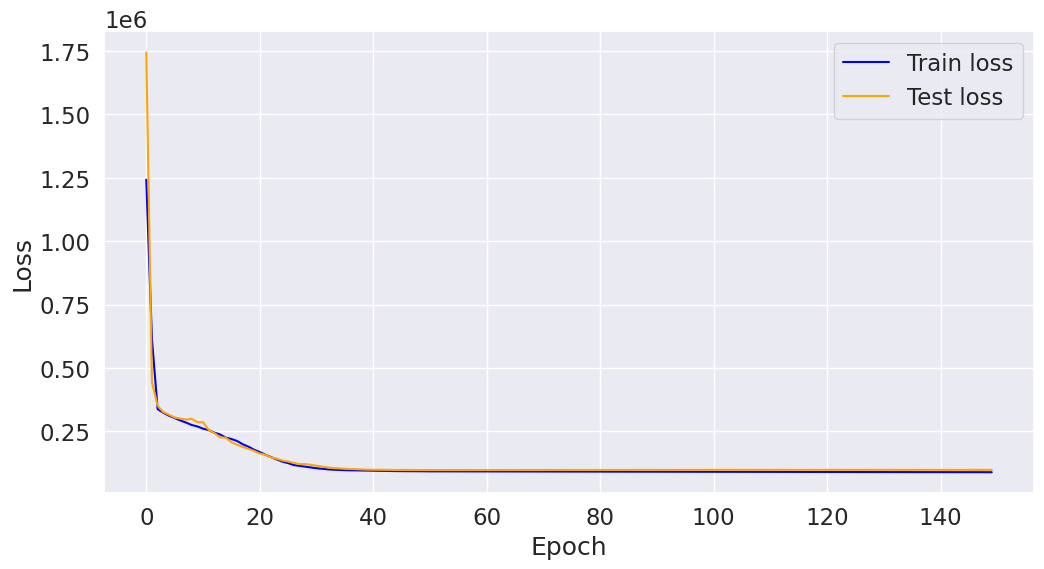

In [278]:
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), train_loss_history, c="blue", label="Train loss")
plt.plot(range(epochs), test_loss_history, c="orange", label="Test loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend();

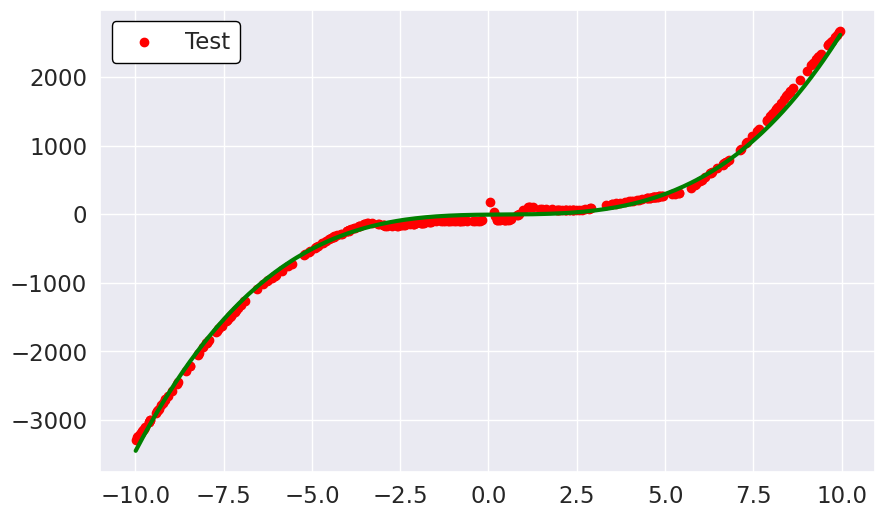

In [279]:
out = model(Variable(X_test))
plt.figure(figsize=(10,6))
#plt.scatter(X_train,y_train, label='Train')
plt.scatter(X_test,out.data.numpy(), label='Test', color="red")
#plt.scatter(X_test,y_test, label='Test', color="yellow")
plt.plot(X, 3*X ** 3 - 4* X ** 2+ 5 * X - 6, color='green', lw=3, alpha = 1)
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.show()